# Natural Language processing: Hate speech classification

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression










pd.options.display.max_colwidth = 300 # to display full tweets as each tweet is of 280 chars

In [7]:
df = pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


As we can see the dataset consist of two columns tweets and type of bullying we can now look into types 
of bullying in cyberbullying_type column

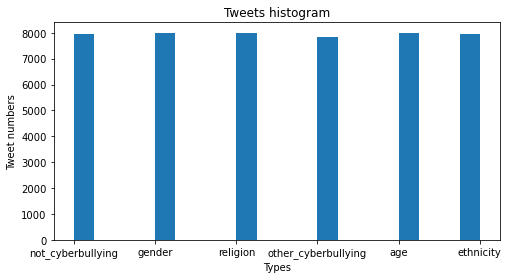

In [8]:
plt.figure(figsize=(8,4))
plt.hist(df.cyberbullying_type, bins=20)
plt.title("Tweets histogram")
plt.ylabel("Tweet numbers")
plt.xlabel("Types")
plt.show()

We can see that the dataset is relatively even in terms of bullying type.

In [9]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

No null values in the dataset which means that we don't have to normalize null values.

In [12]:
 
# Creating a label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label and the encoder returns encoded label in numbers from 0-5
label = le.fit_transform(df['cyberbullying_type'])
  
# Appending the array to our dataFrame
# with column name 'Purchased'
df["target"] = label

In [13]:
df.iloc[10:20]['tweet_text']

10                                                                                                          @Jord_Is_Dead http://t.co/UsQInYW5Gn
11                                                                                              The Bully flushes on KD http://twitvid.com/A2TNP
12                                                                                                                                   Ughhhh #MKR
13    RT @Kurdsnews: Turkish state has killed 241 children in last 11 years http://t.co/JlvkE1epws  #news  ##GoogleÇeviriciTopluluğuKürtçeyideE…
14                         Love that the best response to the hotcakes they managed to film was a non-committal "meh" from some adolescent. #MKR
15                                                               @yasmimcaci @Bferrarii PAREM DE FAZER BULLYING COMIGO =( UHAHUAH BANDO DE PRETO
16                                                                       @sarinhacoral @Victor_Maggi tadinhu de mim , sofrendo bul

In [14]:

def text_cleaner(tweet):
    tweet = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", tweet) # removes twitter user, links, nonwords
    tweet = re.sub(r"\W|\d", " ", tweet) 
    tweet = re.sub(r"[ ]{2,}", " ", tweet)  # removes occurances of more than one white space between words
    return tweet
    

In [15]:
df["tweet_text"]=df.tweet_text.apply(lambda x:text_cleaner(x))

In [16]:
df.iloc[10:20]['tweet_text']

10                                                                                                                    
11                                                                                            The Bully flushes on KD 
12                                                                                                          Ughhhh MKR
13                          RT Turkish state has killed children in last years news GoogleÇeviriciTopluluğuKürtçeyideE
14    Love that the best response to the hotcakes they managed to film was a noncommittal meh from some adolescent MKR
15                                                               PAREM DE FAZER BULLYING COMIGO UHAHUAH BANDO DE PRETO
16                                                                            tadinhu de mim sofrendo bulling viu MIMI
17                                                        dea twitter is basically the angry letters of our generation
18                     Best pick up line Hi your

We can still see that there are some non ASCII characters e.g., "GoogleÇeviriciTopluluğuKürtçeyid" we can apply 
a lamada function that eliminates characters that are not in standard ASCII

In [ ]:
string.printable

We can apply a lambada function that excludes any character that is not in the above list 
at the same time we can convert all letters to small letters by passing by applying .lower() method when passing
the tween to non_ascii_filter

In [17]:
def non_ascii_filter(tweet):
    # excludes any character that is not in ASCII
    return ''.join(filter(lambda x: x in set(string.printable), tweet)) 


In [18]:
df["tweet_text"]=df.tweet_text.apply(lambda x: non_ascii_filter(x.lower()))

In next cell we will lemmatize words and remove stop words at the same time

In [19]:
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = ' '.join(wordnet_lemmatizer.lemmatize(token) for token in tokens if token not in stop_words)
    return filtered_tokens

df['filtered_tokens'] = df['tweet_text'].apply(remove_stop_words)

In [20]:
# df["cyberbullying_type"] = (df.cyberbullying_type == 'not_cyberbullying').astype(int)

In [22]:
# We will create pd series for labels and targets
X = df.filtered_tokens.values
y = df.target.values

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)

In [ ]:



# Make predictions on the test set
y_pred = model.predict(test_data)

# Convert the predictions to class labels
y_pred = y_pred.argmax(axis=1)

# # Calculate the F1 score and confusion matrix
report = classification_report(test.target, y_pred)
# confusion = confusion_matrix(test.cyberbullying_type, y_pred)

print(report)
print(confusion)
# len(test.cyberbullying_type)

In [38]:
# Vectorization using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [39]:
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8220344367494758


In [40]:
y_pred = classifier.predict(X_test)

In [41]:
# Convert the predictions to class labels

# Convert the predictions to class labels
# y_pred = y_pred.argmax(axis=1)
# # Calculate the F1 score and confusion matrix
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(report)
print(confusion)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2620
           1       0.99      0.97      0.98      2671
           2       0.91      0.82      0.86      2649
           3       0.58      0.57      0.57      2622
           4       0.57      0.65      0.61      2549
           5       0.96      0.93      0.95      2628

    accuracy                           0.82     15739
   macro avg       0.83      0.82      0.82     15739
weighted avg       0.83      0.82      0.83     15739

[[2549    1    6   32   30    2]
 [   4 2600   14   18   32    3]
 [   6   10 2181  199  244    9]
 [  58   10   81 1492  913   68]
 [  17   10  109  733 1664   16]
 [   1    4   15  115   41 2452]]


In [32]:
classes = []
for i in range (6):
    class_name = df.loc[df['target'] == i, 'cyberbullying_type'].iloc[0]
    classes.append(class_name)

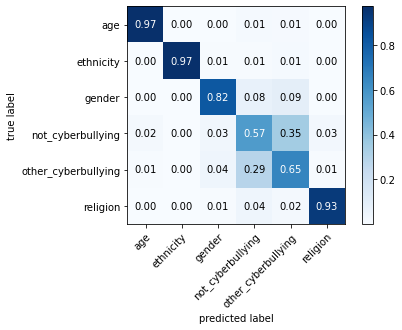

In [42]:

figure, ax = plot_confusion_matrix(conf_mat = confusion,
                                   class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,

                                   colorbar = True)

plt.show()

In [3]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Unzipping models/word2vec_sample.zip.


True

In [6]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [30]:
model.fit(X_train, y_train)
# labels = model.predict(y_test)
y_pred = model.predict(X_test)

In [43]:
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 2.11.0
pandas: 1.3.3
numpy: 1.21.0
sklearn: 1.2.0
plotly: 5.3.1
